Dataset Head:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
m

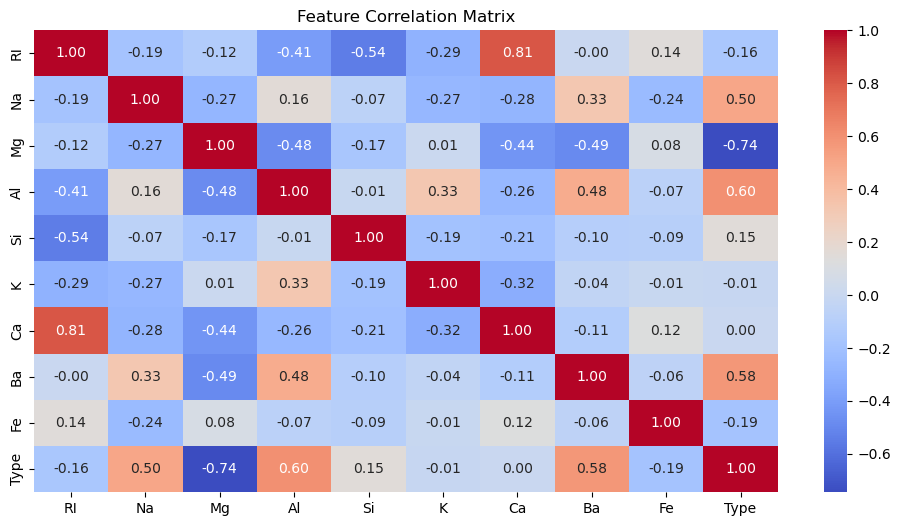

<Figure size 1200x800 with 0 Axes>

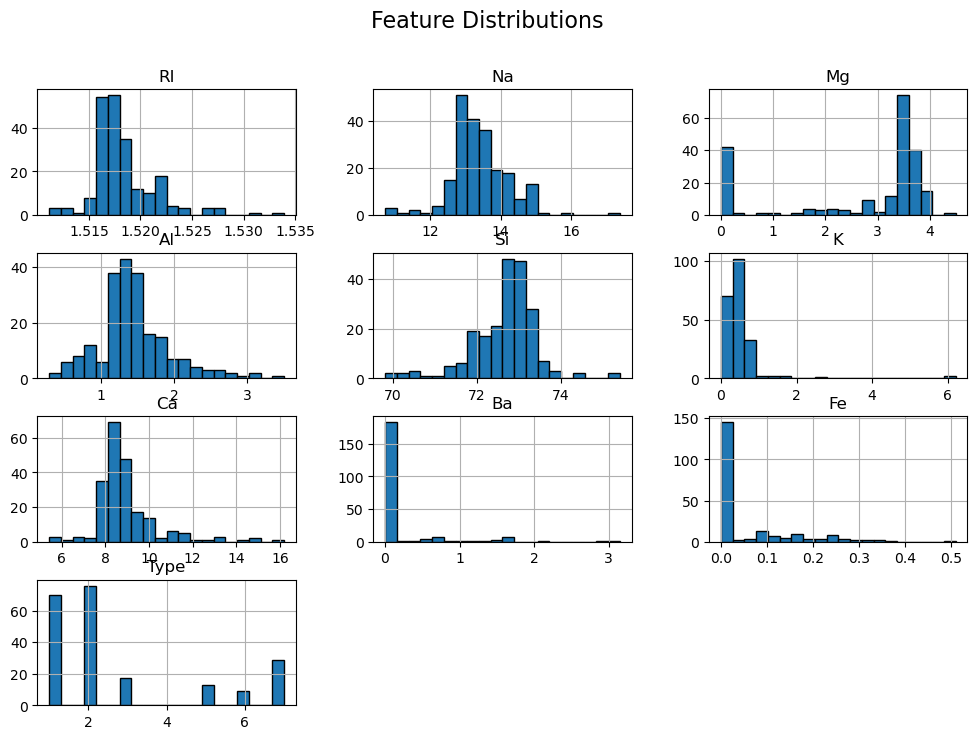

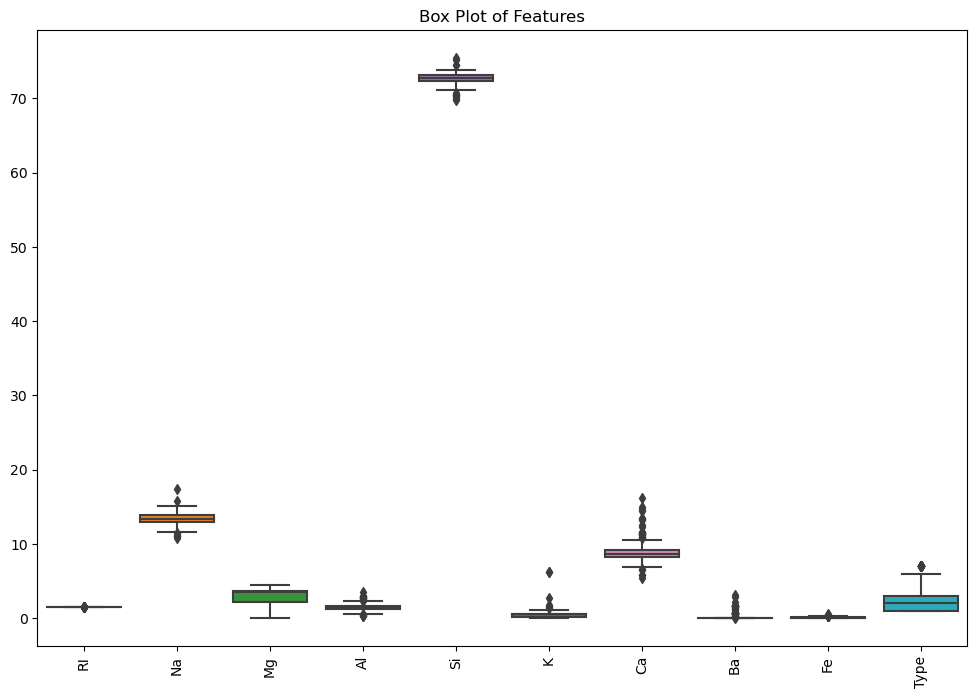

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

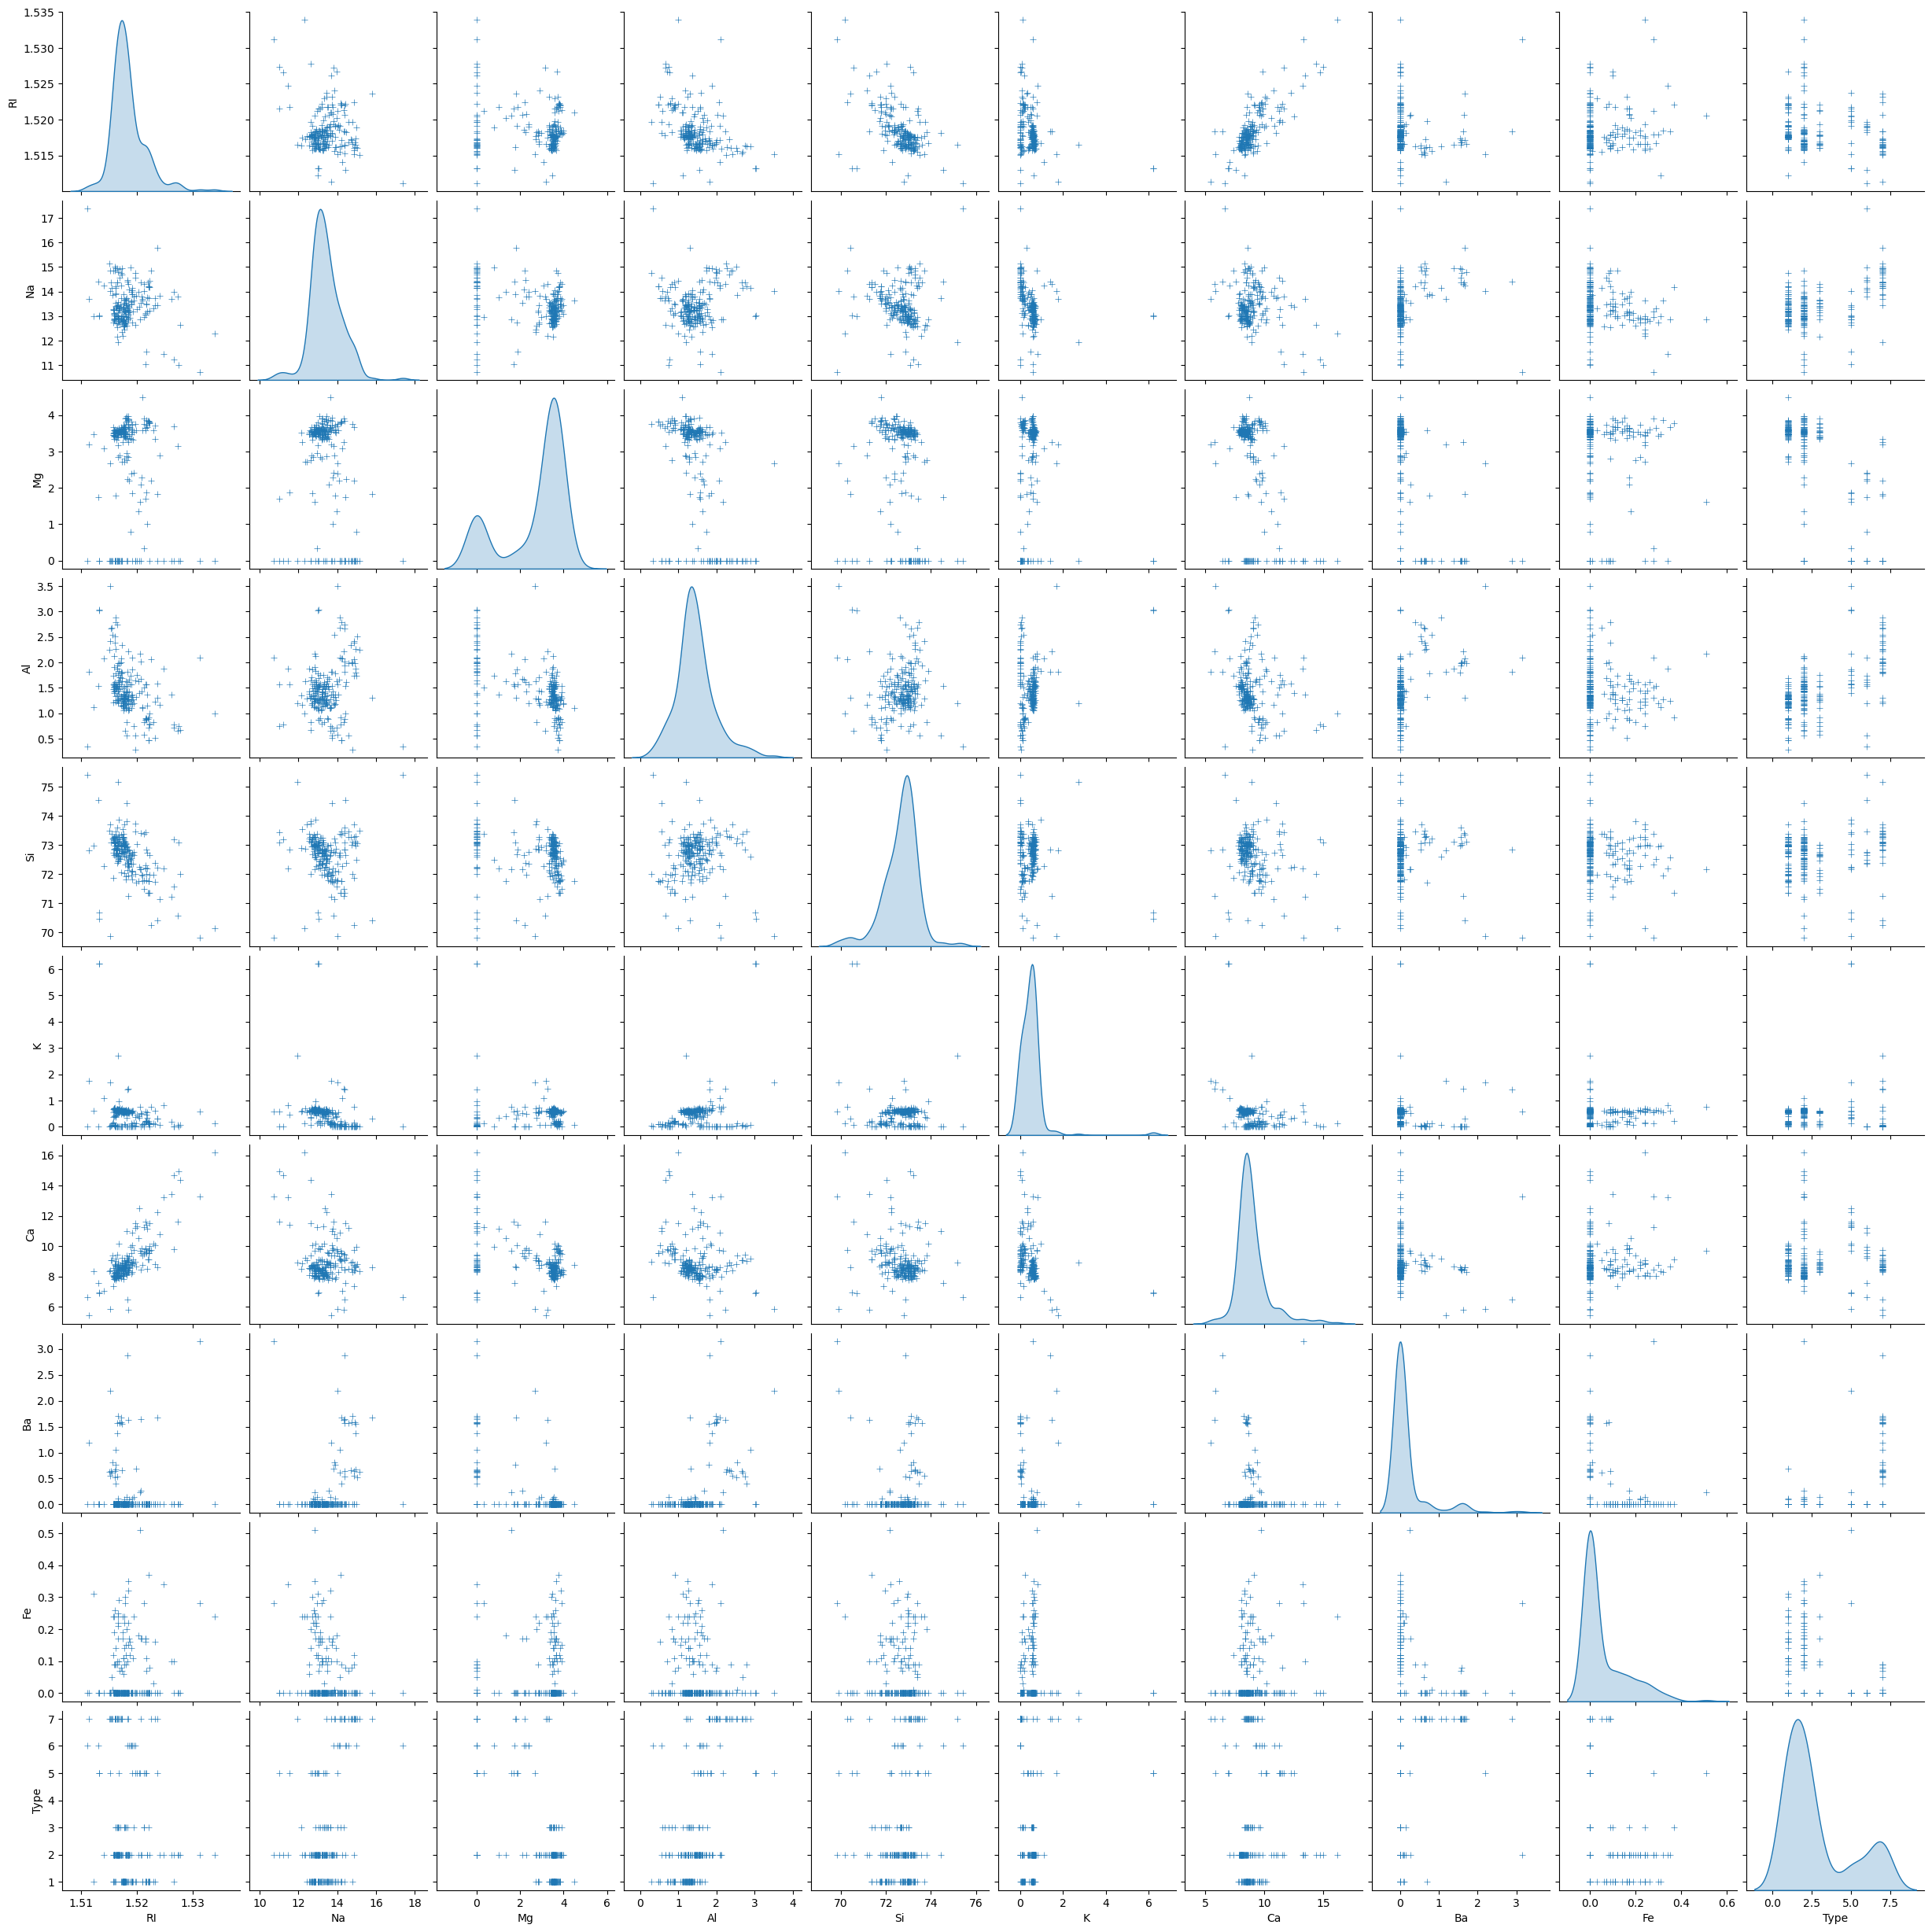


Training Random Forest Classifier...
Best Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.8372093023255814
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       0.79      0.79      0.79        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.81      0.84        43
weighted avg       0.85      0.84      0.83        43



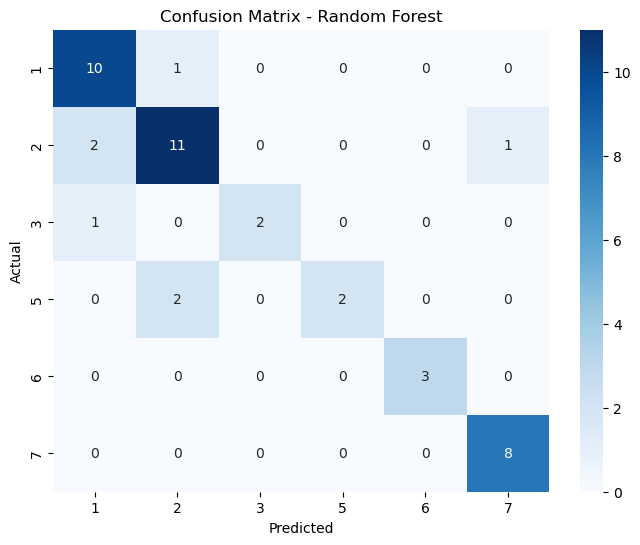


Training Bagging Classifier...


TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Load dataset
df = pd.read_excel(r"C:\Users\Owner\OneDrive\Desktop\SVM\Recomandation system\glass.xlsx", sheet_name="glass")

# Display dataset details
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

# Select numerical features
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap
if not numeric_df.empty:
    plt.figure(figsize=(12, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Matrix")
    plt.show()

# Histogram of numerical features
if not numeric_df.empty:
    plt.figure(figsize=(12, 8))
    numeric_df.hist(bins=20, figsize=(12, 8), edgecolor='black')
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.show()

# Boxplot for numerical features
if not numeric_df.empty:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=numeric_df)
    plt.xticks(rotation=90)
    plt.title("Box Plot of Features")
    plt.show()

# Pairplot of numerical features
if not numeric_df.empty:
    sns.pairplot(numeric_df, diag_kind='kde', markers='+')
    plt.show()

# Encode categorical column "Type" if it exists
if 'Type' in df.columns and df['Type'].dtype == object:
    le = LabelEncoder()
    df['Type'] = le.fit_transform(df['Type'])

# Define features and target variable
X = df.drop(columns=['Type']) if 'Type' in df.columns else df
y = df['Type'] if 'Type' in df.columns else None

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- RANDOM FOREST --------------------
print("\nTraining Random Forest Classifier...")
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

rf_clf = grid_search.best_estimator_
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Best Random Forest Parameters:", grid_search.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# -------------------- BAGGING CLASSIFIER --------------------
print("\nTraining Bagging Classifier...")
bagging_clf = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)

print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging Classifier Report:\n", classification_report(y_test, y_pred_bagging))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()

# -------------------- ADABOOST CLASSIFIER --------------------
print("\nTraining AdaBoost Classifier...")
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_clf.fit(X_train, y_train)
y_pred_adaboost = adaboost_clf.predict(X_test)

print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("AdaBoost Classifier Report:\n", classification_report(y_test, y_pred_adaboost))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.show()

# -------------------- GRADIENT BOOSTING CLASSIFIER --------------------
print("\nTraining Gradient Boosting Classifier...")
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


Dataset Head:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
m

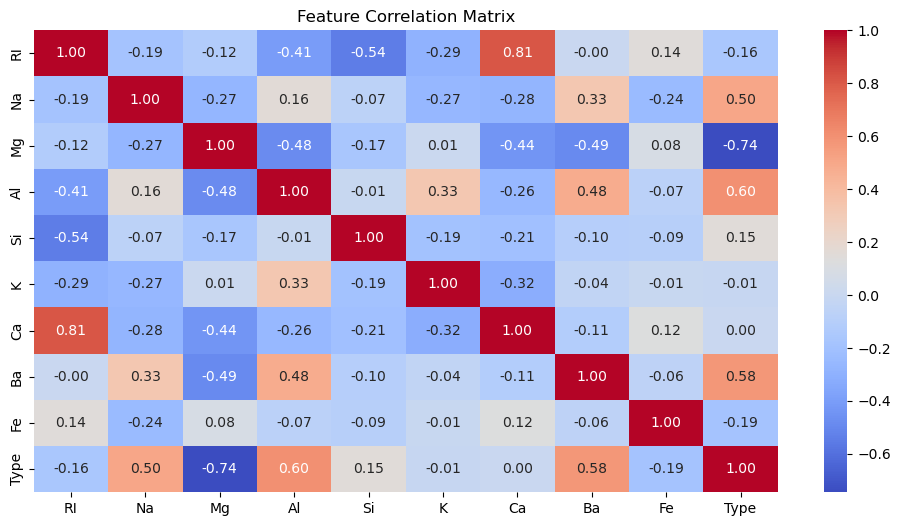

<Figure size 1200x800 with 0 Axes>

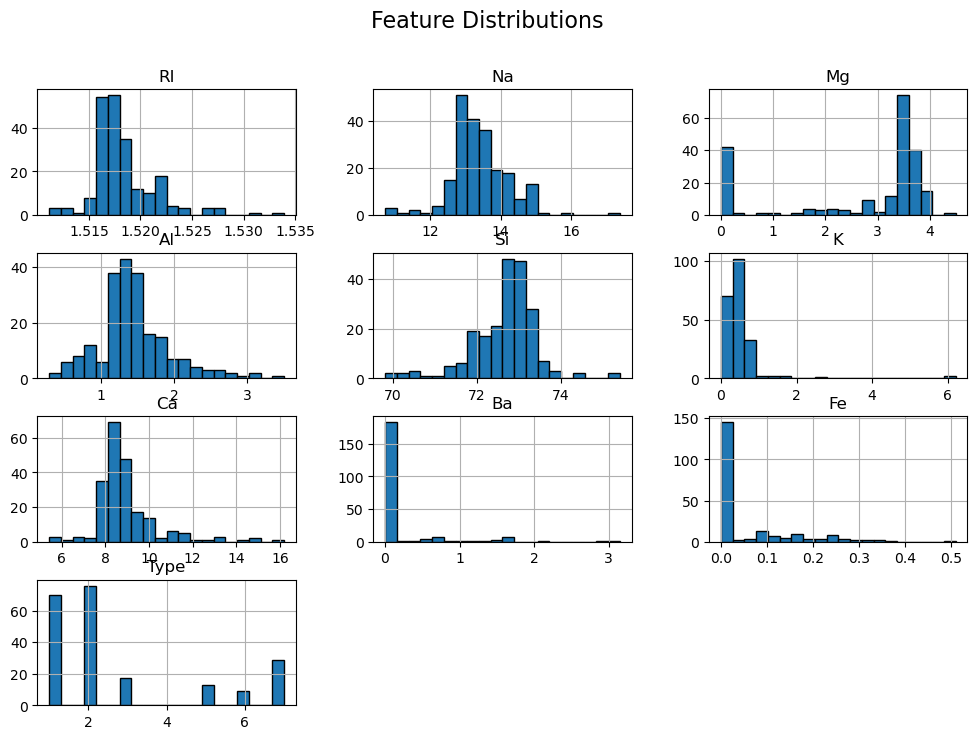

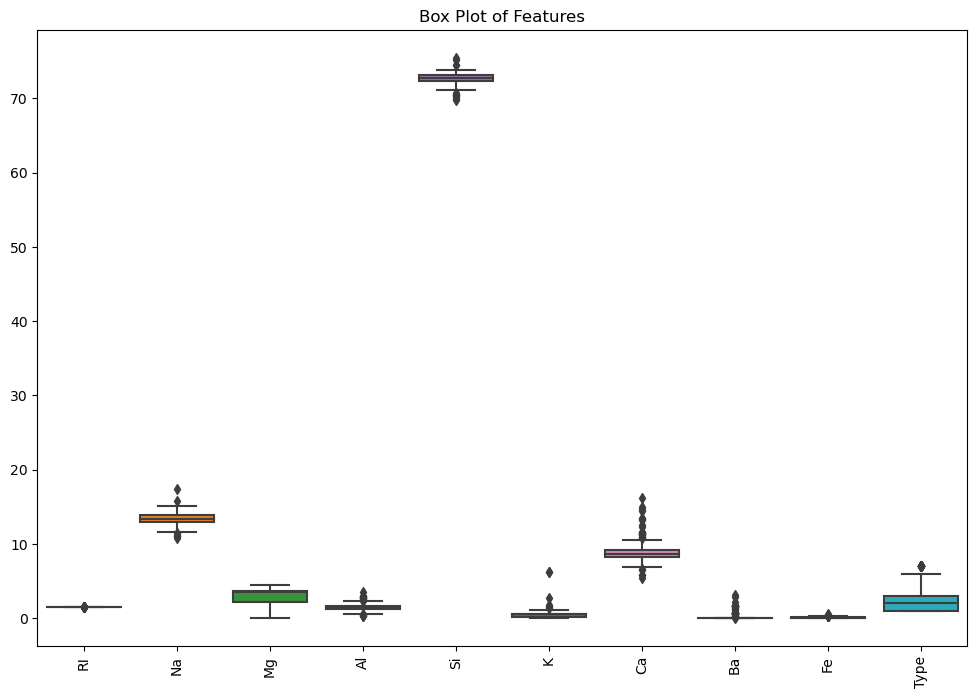

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

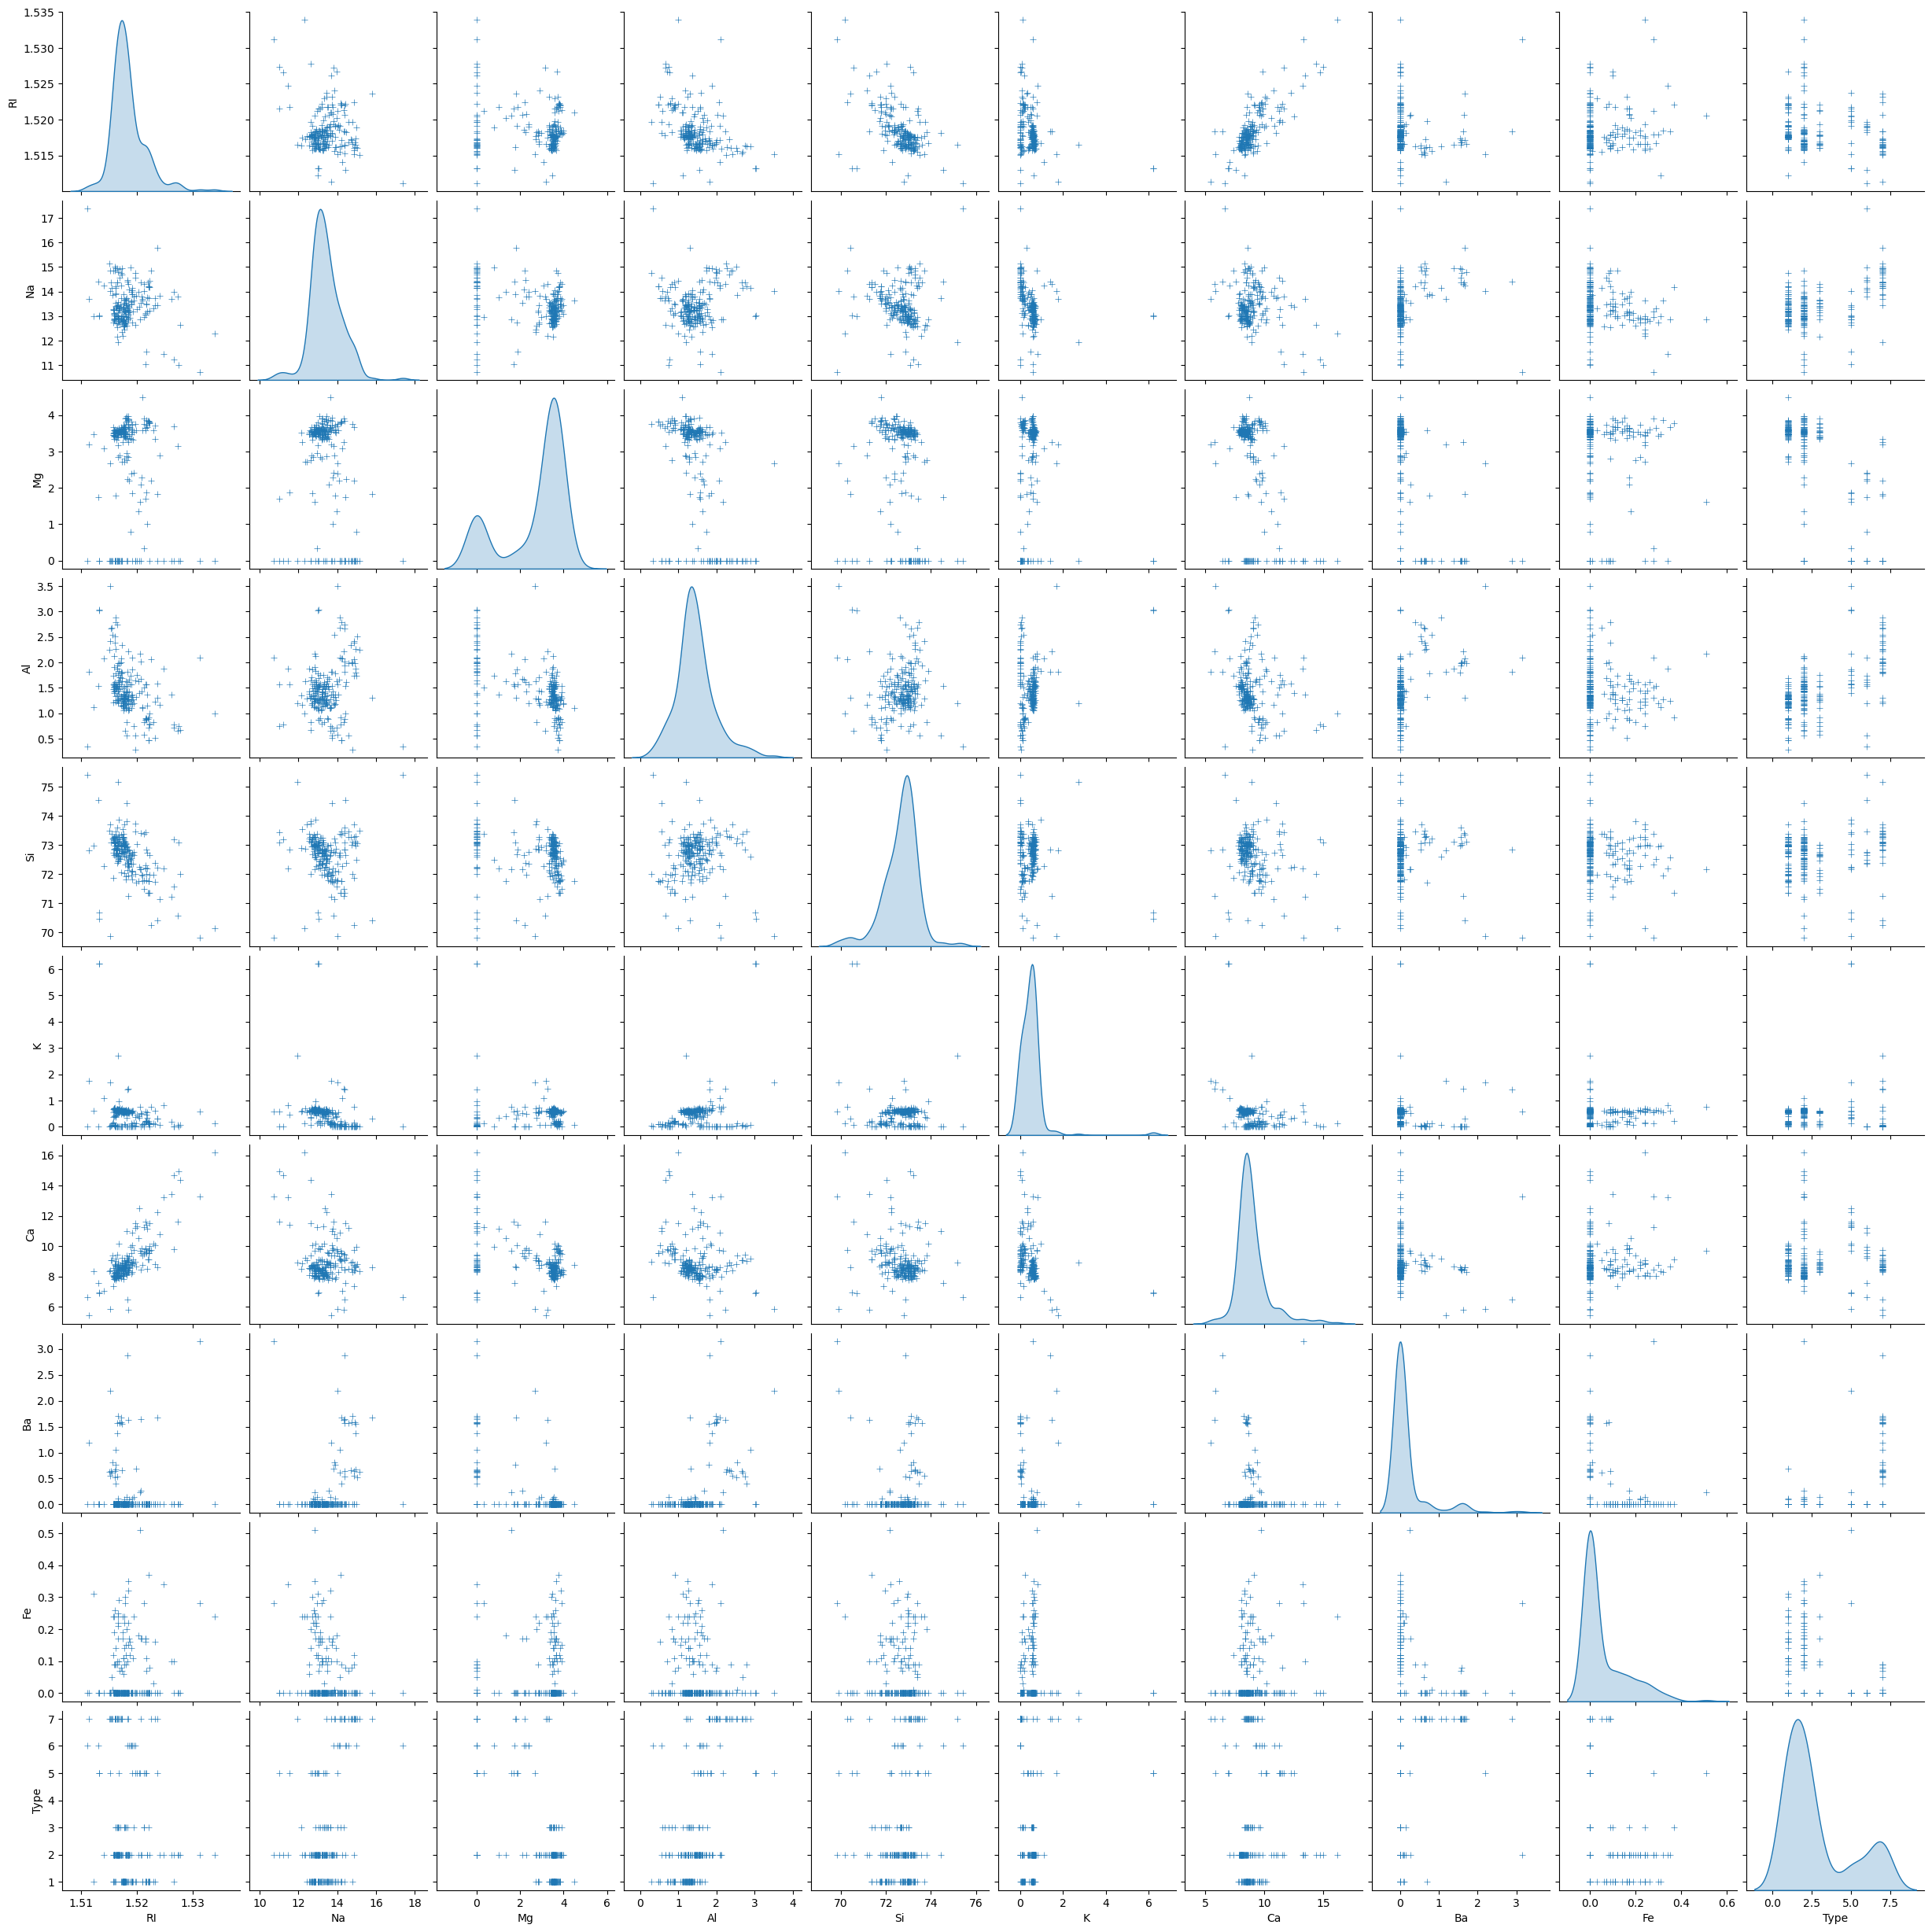

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.8372093023255814
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.79      0.79      0.79        14
           2       1.00      0.67      0.80         3
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         3
           5       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.81      0.84        43
weighted avg       0.85      0.84      0.83        43



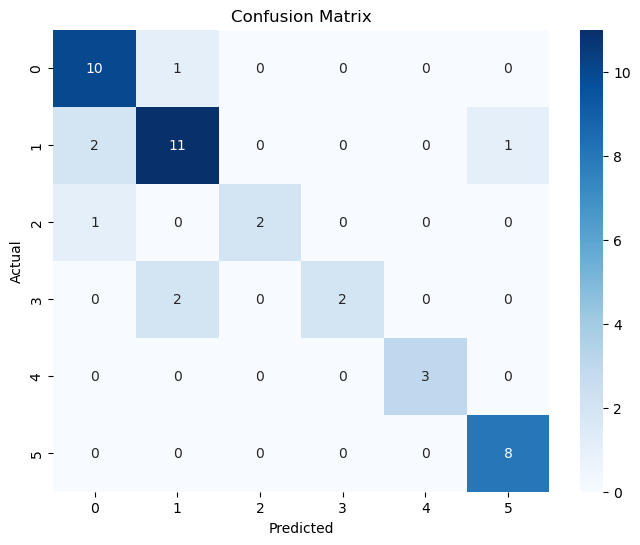


Training Bagging Classifier...
Bagging Accuracy: 0.8372093023255814

Training AdaBoost Classifier...
AdaBoost Accuracy: 0.5348837209302325

Training Gradient Boosting Classifier...
Gradient Boosting Accuracy: 0.8604651162790697

Training XGBoost Classifier...
XGBoost Accuracy: 0.8372093023255814


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Load Dataset
df = pd.read_excel(r"C:\Users\Owner\OneDrive\Desktop\SVM\Recomandation system\glass.xlsx", sheet_name="glass")

print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())

# Exploratory Data Analysis (EDA)
numeric_df = df.select_dtypes(include=[np.number])

if not numeric_df.empty:
    plt.figure(figsize=(12, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Feature Correlation Matrix")
    plt.show()

    plt.figure(figsize=(12, 8))
    numeric_df.hist(bins=20, figsize=(12, 8), edgecolor='black')
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.boxplot(data=numeric_df)
    plt.xticks(rotation=90)
    plt.title("Box Plot of Features")
    plt.show()

    sns.pairplot(numeric_df, diag_kind='kde', markers='+')
    plt.show()

# Encode target variable if necessary
if 'Type' in df.columns:
    le = LabelEncoder()
    df['Type'] = le.fit_transform(df['Type'])  # Encode labels

X = df.drop(columns=['Type'])
y = df['Type']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

clf = grid_search.best_estimator_
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# -------------------- BAGGING CLASSIFIER --------------------
print("\nTraining Bagging Classifier...")
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))

# -------------------- BOOSTING METHODS --------------------

# AdaBoost Classifier
print("\nTraining AdaBoost Classifier...")
adaboost_clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
adaboost_clf.fit(X_train, y_train)
y_pred_ada = adaboost_clf.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

# Gradient Boosting Classifier
print("\nTraining Gradient Boosting Classifier...")
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

# -------------------- XGBoost CLASSIFIER --------------------
print("\nTraining XGBoost Classifier...")

# Ensure class labels start from 0
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_clf = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
xgb_clf.fit(X_train, y_train_encoded)  # Use encoded labels
y_pred_xgb = xgb_clf.predict(X_test)

# Decode predictions back to original labels if needed
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
